## Course Information
INFO 521: Introduction to Machine Learning\
Instructor: Xuan Lu, College of Information Science

## Instructions
#### Objectives
This worksheet will assess your knowledge of basic commands in Python. Please review the lectures, suggested readings, and additional resources before starting the homework, as this document closely follows the provided materials.

#### Grading
Please note that grades are **NOT exclusively based on your final answers**. We will be grading the overall structure and logic of your code. Feel free to use as many lines as you need to answer each of the questions. I also highly recommend and strongly encourage adding comments (`#`) to your code. Comments will certainly improve the reproducibility and readability of your submission. Commenting your code is also good coding practice. **Specifically for the course, you’ll get better feedback if the TA is able to understand your code in detail.**

__Total score__: 100 points, with an additional 10 points available for extra credit.

#### Submission
This homework is due by the end of the week it is released (**Sunday, 11:59 pm AZ time**). Please contact the instructor if you are (i) having issues opening the assignment, (ii) not understanding the questions, or (iii) having issues submitting your assignment. Note that late submissions are subject to a penalty (see late work policies in the syllabus).
- Please submit a single Jupyter Notebook file (this file). Answers to each question should be included in the relevant block of code (see below). Rename your file to "**lastname_Hw4.ipynb**" before submitting. <font color='red'>A broken file won’t be graded, so please ensure that your file is accessible.</font> If a given block of code is causing issues and you didn't manage to fix it, please add comments.

#### Time commitment
Please reach out if you’re taking more than ~18h to complete (1) this homework, (2) reading the book chapters, and (3) going over the lectures. I will be happy to provide accommodations if necessary. **Do not wait until the last minute to start working on this homework**. In most cases, working under pressure will certainly increase the time needed to answer each of these questions and the instructor and the TA might not be 100% available on Sundays to troubleshoot with you.

#### Looking for help?
First, please go over the relevant readings for this week. Second, if you’re still struggling with any of the questions, do some independent research (e.g. stackoverflow is a wonderful resource). Don’t forget that your classmates will also be working on the same questions - reach out for help (check under the Discussion forum for folks looking to interact with other students in this class or start your own thread). Finally, the TA is available to answer any questions during office hours and via email.

## Questions
#### Author:
Name: Christian Ortmann\
Affiliation: Computing Sciences Researcher, SMMR; MSDS 25'

### Conceptual

#### Question 1

Let’s examine the differences between LDA and QDA.

  a) If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? What about in the test set?

> **_Answer:_**  [If the boundary is linear, we can expect QDA to fit better because it is more flexible, similar to a linear vs quadratic fit in linear regression. For testing, since the QDA is so flexible, it may be over fit to the training data and perform worse on the test data than LDA.].

  b) If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?

> **_Answer:_**  [If the boundary is non-linear, we can expect QDA to perform better because it is more flexible and likely can fit the non-linear shape of the data vs the inflexible linearity of LDA].

  c) In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?

> **_Answer:_**  [As sample size increases, QDA will likely be more accurate (improve) as a larger dataset will likely have more variance in the data, and a flexible model can handle more variance compared to an inflexible one when we have lots of data and thus avoids or minimizes the possiblity of an overfit].

  d) __True or False__: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. __Justify your answer__.

> **_Answer:_**  [False, QDA will likely overfit for a linear boundary because it will likely succumb to the variance in the data and model a relationship that is overly complex and unrepresentative of our data].

#### Question 2

In relation to the odds and the Default dataset discussed in the book and lecture,\
  a) On average, what fraction of people with an odds of `0.37` of defaulting on their credit card payment will in fact default?

> **_Answer:_**  [$OR$ = $P/(1-P)$, thus rearrange our equation and solve for P. P = 0.37/(1+0.37) = 0.27 or 27%]

  b) Suppose that an individual has a `16%` chance of defaulting on their credit card payment. What are the odds that they will default?

> **_Answer:_**  [Using $OR$ = $P/(1-P)$, we can computed 0.16/(1-0.16) = 0.19 or 19%].

#### Question 3

Suppose that we take a data set, divide it into equally sized training and test sets, and then try out two different classification procedures. First, we use logistic regression and get an error rate of `20%` on the training data and `30%` on the test data. Next we use 1-nearest neighbors (i.e. `K=1`) and get an average error rate (averaged over both test and training data sets) of `18%`. Based on these results, which method should we prefer to use for classification of new observations? Why?

> **_Answer:_**  [Since KNN has k=1, we can assume training error is 0%. This means then that the KNN average error is 0.18 = (x+0)/2, where x is test error. Solving for x shows that our test error is equal to 0.36, meaning that KNN has a larger test error than logit. This means that we should use the logistic regression for NEW observations because it has a lower test error at 30% compared to KNN which has a test error of 36%.].

### Applied
Feel free to use any function you find suitable if a specific function is not explicitly required.

#### Question 4

This question should be answered using the `Weekly` data set. This data is similar in nature to the `Smarket` data examined in the book (Ch4, lab). First, load the dataset:

In [524]:
# BEGIN SOLUTION
import pandas as pd

weekly = pd.read_csv('/Users/cortmann/Desktop/521 - Machine Learning/INFO521/521Data/Weekly.csv') #space delimited (not tsv), use delim white space for this
weekly

# END SOLUTION

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


  a) Produce some numerical and graphical summaries of the `Weekly` data. Can you identify any patterns? Hint: examine the __correlation__ between predictors.

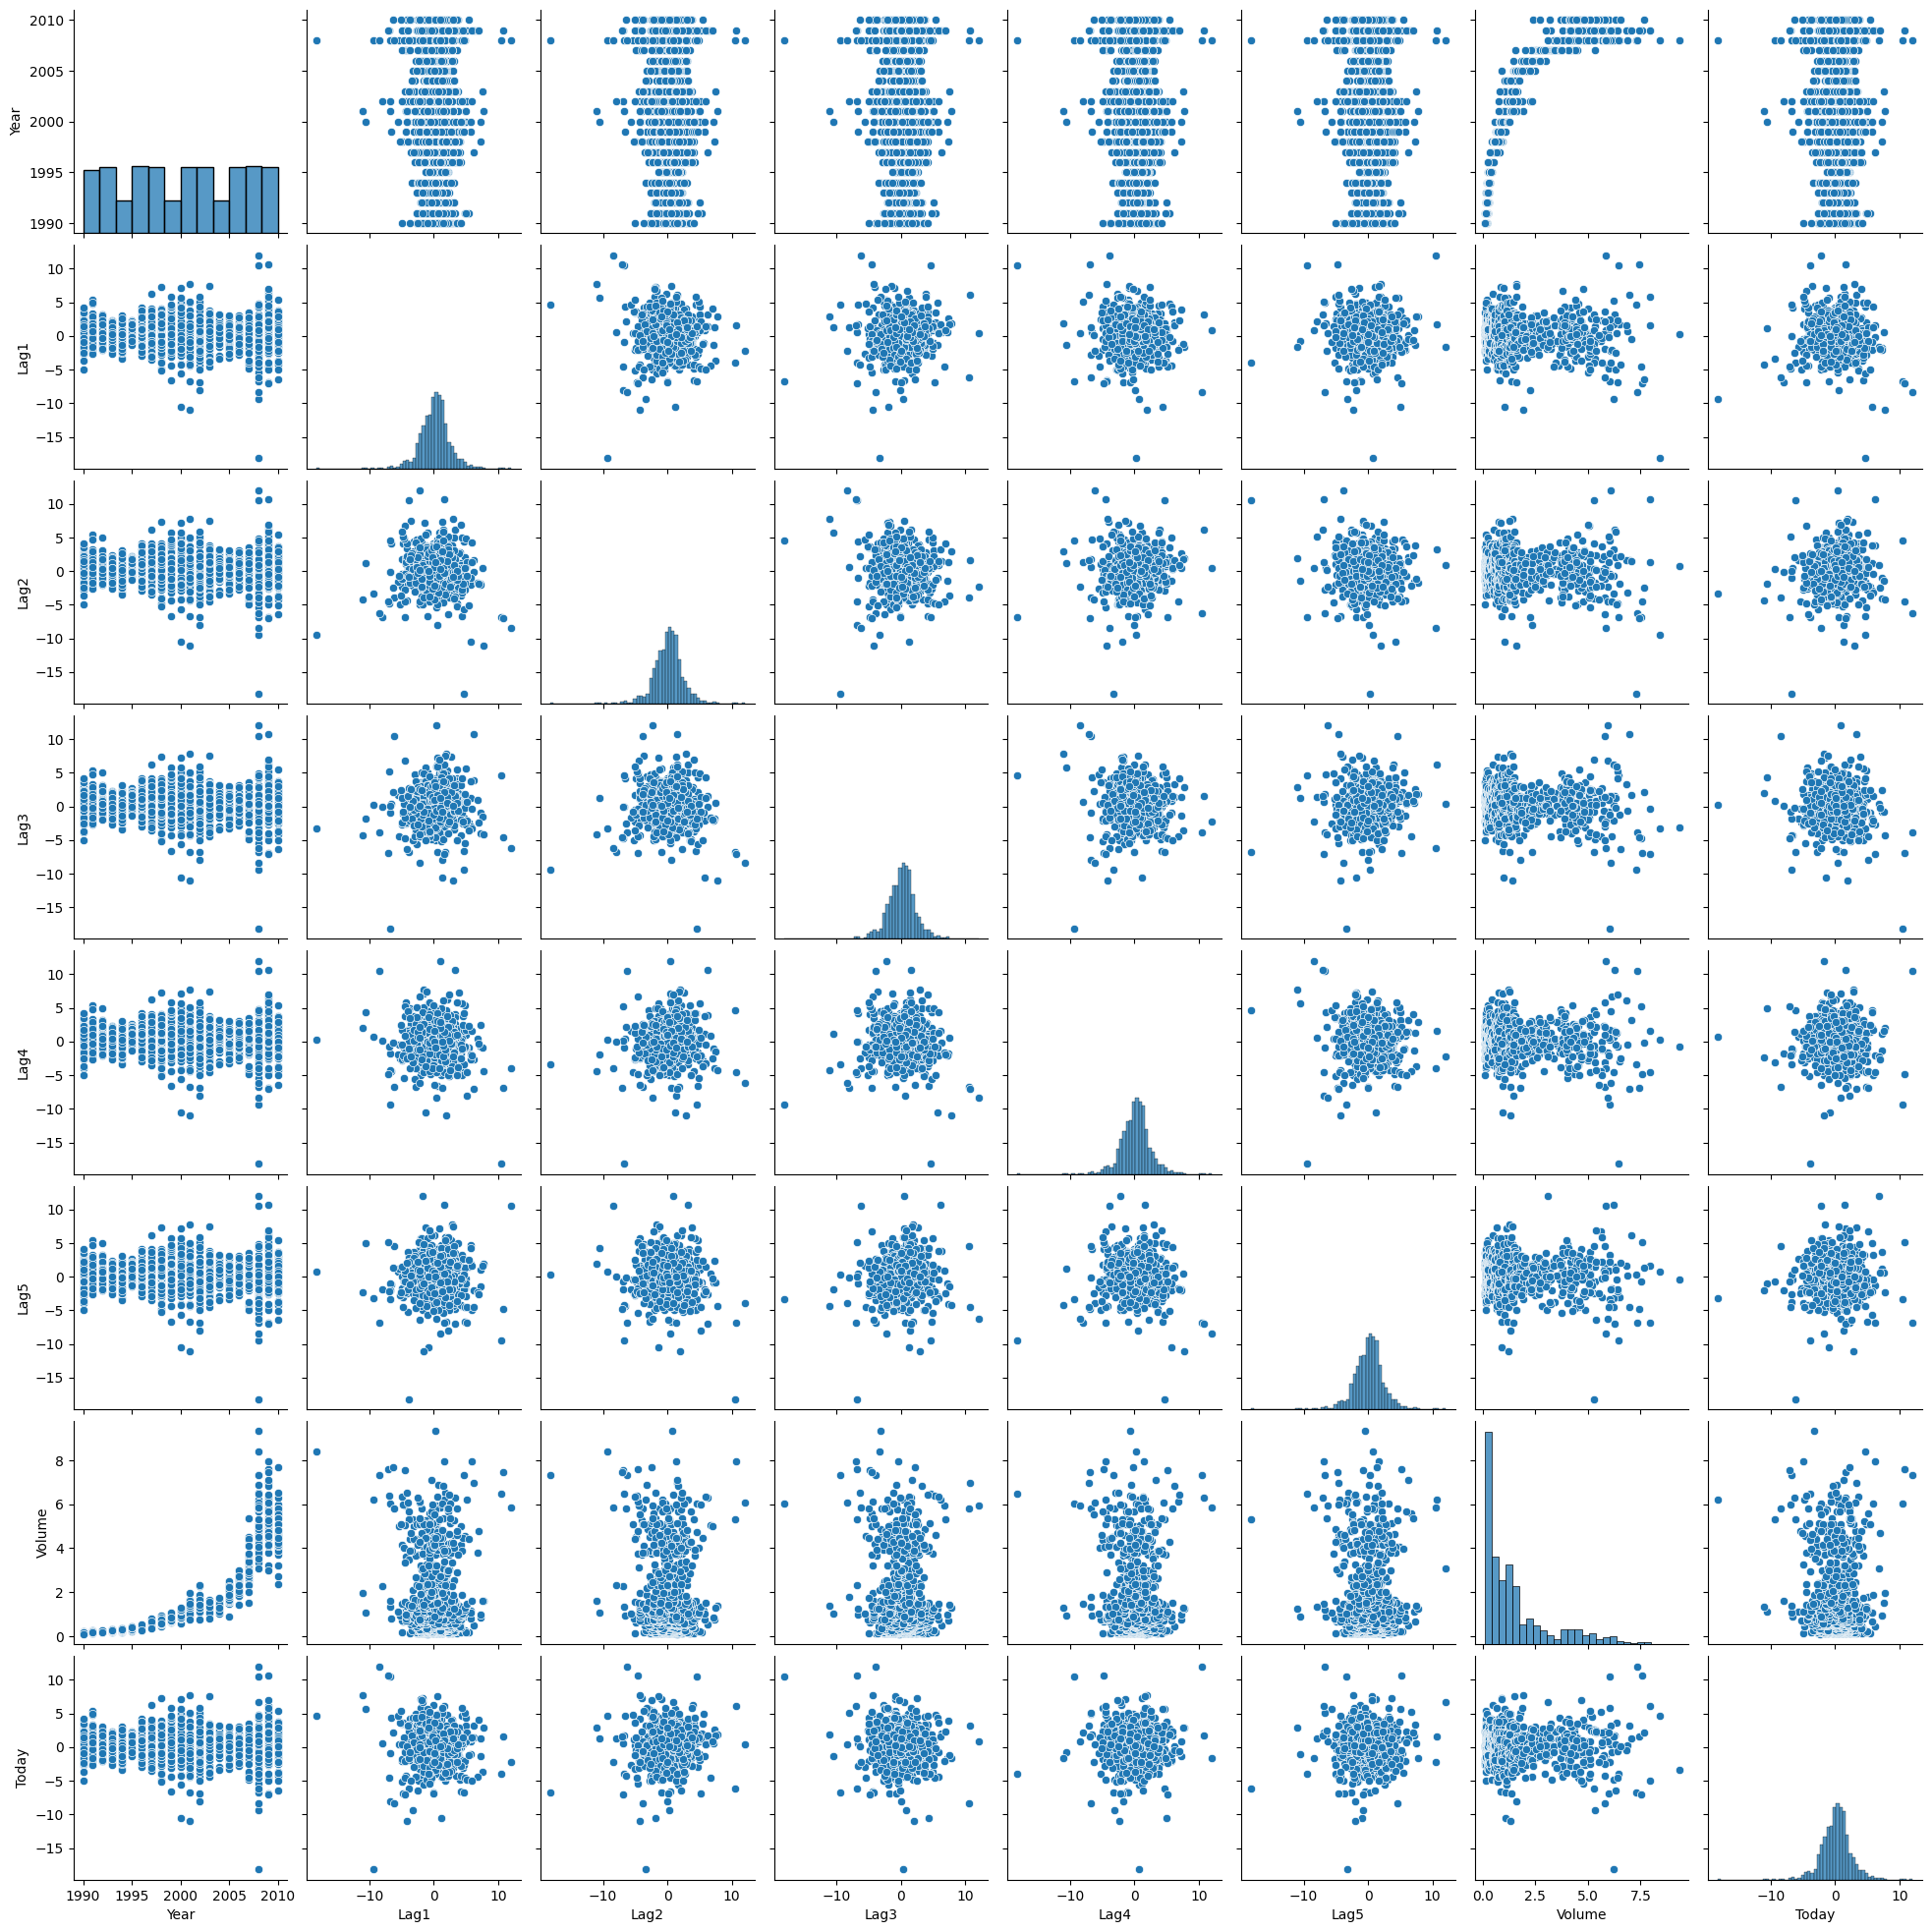

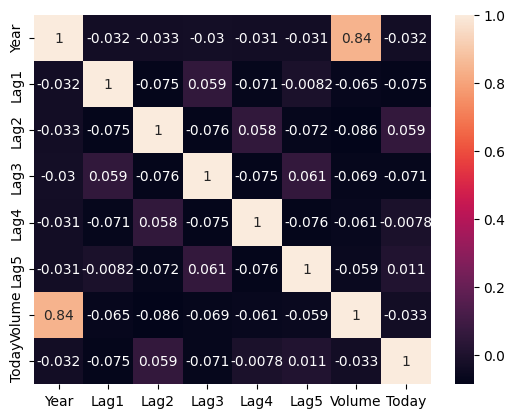

In [525]:
# BEGIN SOLUTION

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(weekly)
dropDir = weekly.drop(columns = ['Direction']) #drop direction column so we can plot with heatmap
plt.figure()
sns.heatmap(dropDir.corr(), annot=True); #stop text output

# END SOLUTION

ANS: There is minimal correlation between the predictors as most have correlation values around zero and the graphical outputs display no trends. The only correlation that exists is Year and Volume, with a strong positive correlation of 0.84.

  b) Use the full data set to perform a logistic regression with `Direction` as the response and the five `lag` variables plus `Volume` as predictors. Print the regression results. Do any of the predictors appear to be statistically significant? If so, which ones? 

In [526]:
# BEGIN SOLUTION

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

dir = weekly["Direction"].map({"Up": 1, "Down": 0}) #convert strings to numeric categories
week = weekly[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]

x_train, x_test, y_train, y_test = train_test_split(week, dir, test_size=0.20, random_state=41)

x_testC = sm.add_constant(x_test) #add constant
x_trainC = sm.add_constant(x_train) #add constant
logitModel = sm.Logit(y_train, x_trainC).fit()
logitModel.summary()

# END SOLUTION

Optimization terminated successfully.
         Current function value: 0.683017
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  871
Model:                          Logit   Df Residuals:                      864
Method:                           MLE   Df Model:                            6
Date:                Sun, 22 Sep 2024   Pseudo R-squ.:                0.006781
Time:                        17:53:59   Log-Likelihood:                -594.91
converged:                       True   LL-Null:                       -598.97
Covariance Type:            nonrobust   LLR p-value:                    0.2292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2060      0.095      2.161      0.031       0.019       0.393
Lag1          -0.0328      0.030     -1.094      0.274      -0.091       0.026
Lag2           0.0750      0.032      2.344      0.019       0.012       0.138
Lag3          -0.0007      0.031     -0.024      0.981      -0.062       0.060
Lag4          -0.0313      0.030     -1.038      0.299      -0.090       0.028
Lag5          -0.0065      0.030     -0.215      0.830      -0.066       0.053
Volume         0.0038      0.042      0.090      0.928      -0.079       0.087
==============================================================================
"""

ANS: Assuming a p-value threshhold of 0.05, the predictor that appears to be significant is 'Lag2' as it is the only parameter with a p-value below 0.05. 

c) Compute the __confusion matrix__ and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

fraction of correct predictions is 126/218


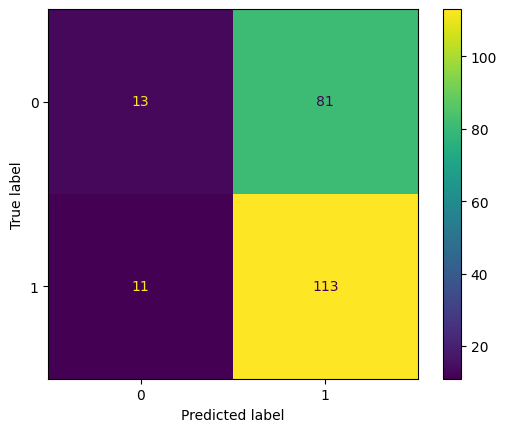

In [527]:
# BEGIN SOLUTION

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
logitModelPredict = logitModel.predict(x_testC)
predictionDir = list(map(round, logitModelPredict)) #round probabilities, default threshokd is 0.5

cm = confusion_matrix(y_test,predictionDir)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();
print(f'fraction of correct predictions is {(cm[0][0] + cm[1][1])}/{len(y_test)}') #print fraction of correct predictions

# END SOLUTION

ANS: The confusion matrix quantifies the amount of false positives and false negatives in our prediction The lower left-hand and upper right-hand side of the matrix is incorrect predictions and the lower right-hand and upper left-hand side is correct predictions. We can use these ratios to determine the accuracy of our model. In this case we are accurate about 58% of the time.

  d) Now fit the logistic regression model using a training data period from __1990 to 2008__, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from __2009 and 2010__).

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
fraction of correct predictions is 65/104


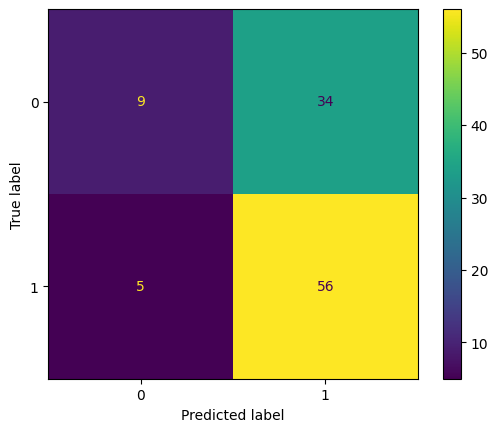

In [528]:
# BEGIN SOLUTION
#train with data from 1990-2008, test with data from 2009-2010

weekly['dirBin'] = weekly["Direction"].map({"Up": 1, "Down": 0}) #convert strings to numeric categories

x_train = weekly.loc[weekly['Year']<2009]['Lag2']#lag2 from early years
y_train = weekly.loc[weekly['Year']<2009]['dirBin']#direction from early years

x_test = weekly.loc[weekly['Year']>2008]['Lag2']#direction from later years
y_test = weekly.loc[weekly['Year']>2008]['dirBin']

x_testC = sm.add_constant(x_test) #add constant
x_trainC = sm.add_constant(x_train) #add constant
logitModel = sm.Logit(y_train, x_trainC).fit()
logitModel.summary()

logitModelPredict = logitModel.predict(x_testC)
predictionDir = list(map(round, logitModelPredict)) #round probabilities

cm = confusion_matrix(y_test,predictionDir)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();
print(f'fraction of correct predictions is {(cm[0][0] + cm[1][1])}/{len(y_test)}')


# END SOLUTION

e) Repeat (d) using LDA.

fraction of correct predictions is 65/104


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


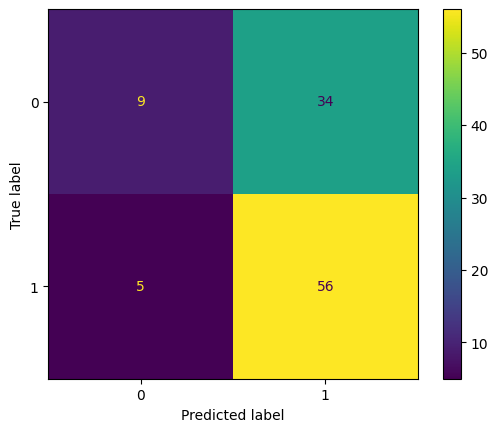

In [529]:
# BEGIN SOLUTION
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
y_train = pd.DataFrame(y_train)
x_train = pd.DataFrame(x_train)
y_test = pd.DataFrame(y_test)
x_test = pd.DataFrame(x_test)

lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
ldaPredict = lda.predict(x_test)

cm = confusion_matrix(y_test,ldaPredict)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();
print(f'fraction of correct predictions is {(cm[0][0] + cm[1][1])}/{len(y_test)}')

# END SOLUTION

f) Repeat (d) using QDA.

fraction of correct predictions is 61/104


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


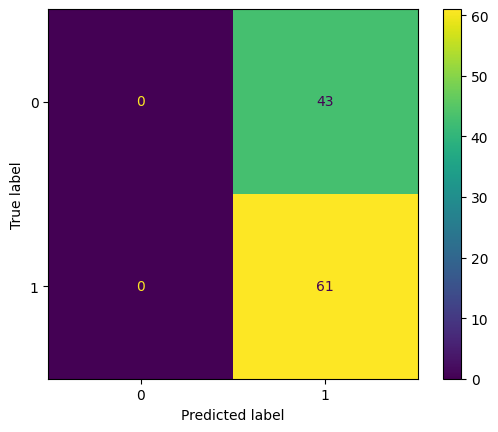

In [530]:
# BEGIN SOLUTION
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis().fit(x_train, y_train)
qdaPredict = qda.predict(x_test)

cm = confusion_matrix(y_test,qdaPredict)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();
print(f'fraction of correct predictions is {(cm[0][0] + cm[1][1])}/{len(y_test)}')

# END SOLUTION

g) Repeat (d) using KNN with K=1 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


fraction of correct predictions is 52/104


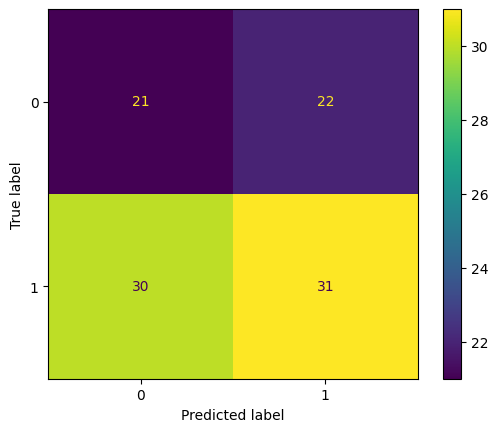

In [531]:
# BEGIN SOLUTION
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)
knnPredict = knn.predict(x_test)

cm = confusion_matrix(y_test,knnPredict)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();
print(f'fraction of correct predictions is {(cm[0][0] + cm[1][1])}/{len(y_test)}')

# END SOLUTION

  h) Which of these methods appears to provide the best results on this data?

> **_Answer:_**  [Logit and LDA appear to perform equal and perform the best out of the 4 models].

#### Question 5

Develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set. Load the dataset:

In [532]:
# BEGIN SOLUTION

auto = pd.read_csv('/Users/cortmann/Desktop/521 - Machine Learning/INFO521/521data/Auto.data', delim_whitespace=True) #space delimited (not tsv), use delim white space for this
print(auto.isna().any()) #check for missing/na values
auto = auto.replace("?", 'NA') #replace ? with NAs
auto = auto[~auto['horsepower'].str.contains('NA')] #drop rows with NAs, for some reason drop ? doesnt work
auto['horsepower'] = pd.to_numeric(auto['horsepower'])

# END SOLUTION

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool


/var/folders/6n/cwl6lb1j5j54r8zxq47cqpbr0000gn/T/ipykernel_1956/3797580067.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto = pd.read_csv('/Users/cortmann/Desktop/521 - Machine Learning/INFO521/521data/Auto.data', delim_whitespace=True) #space delimited (not tsv), use delim white space for this


a) Create a binary variable, `mpg01`, that contains a `1` if `mpg` contains a value above its median, and a `0` if `mpg` contains a value below its median. You can compute the median using the `median()` function. Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `mpg01` and the other `Auto` variables.

In [533]:
# BEGIN SOLUTION
import statistics as st
import numpy as np

auto['mpg01'] = np.where(auto["mpg"] > st.median(auto["mpg"]), 1, 0) #numpy where conditional


# END SOLUTION

b) __Explore__ the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? _Scatterplots and boxplots may be useful tools to answer this question_. __Describe your findings__.

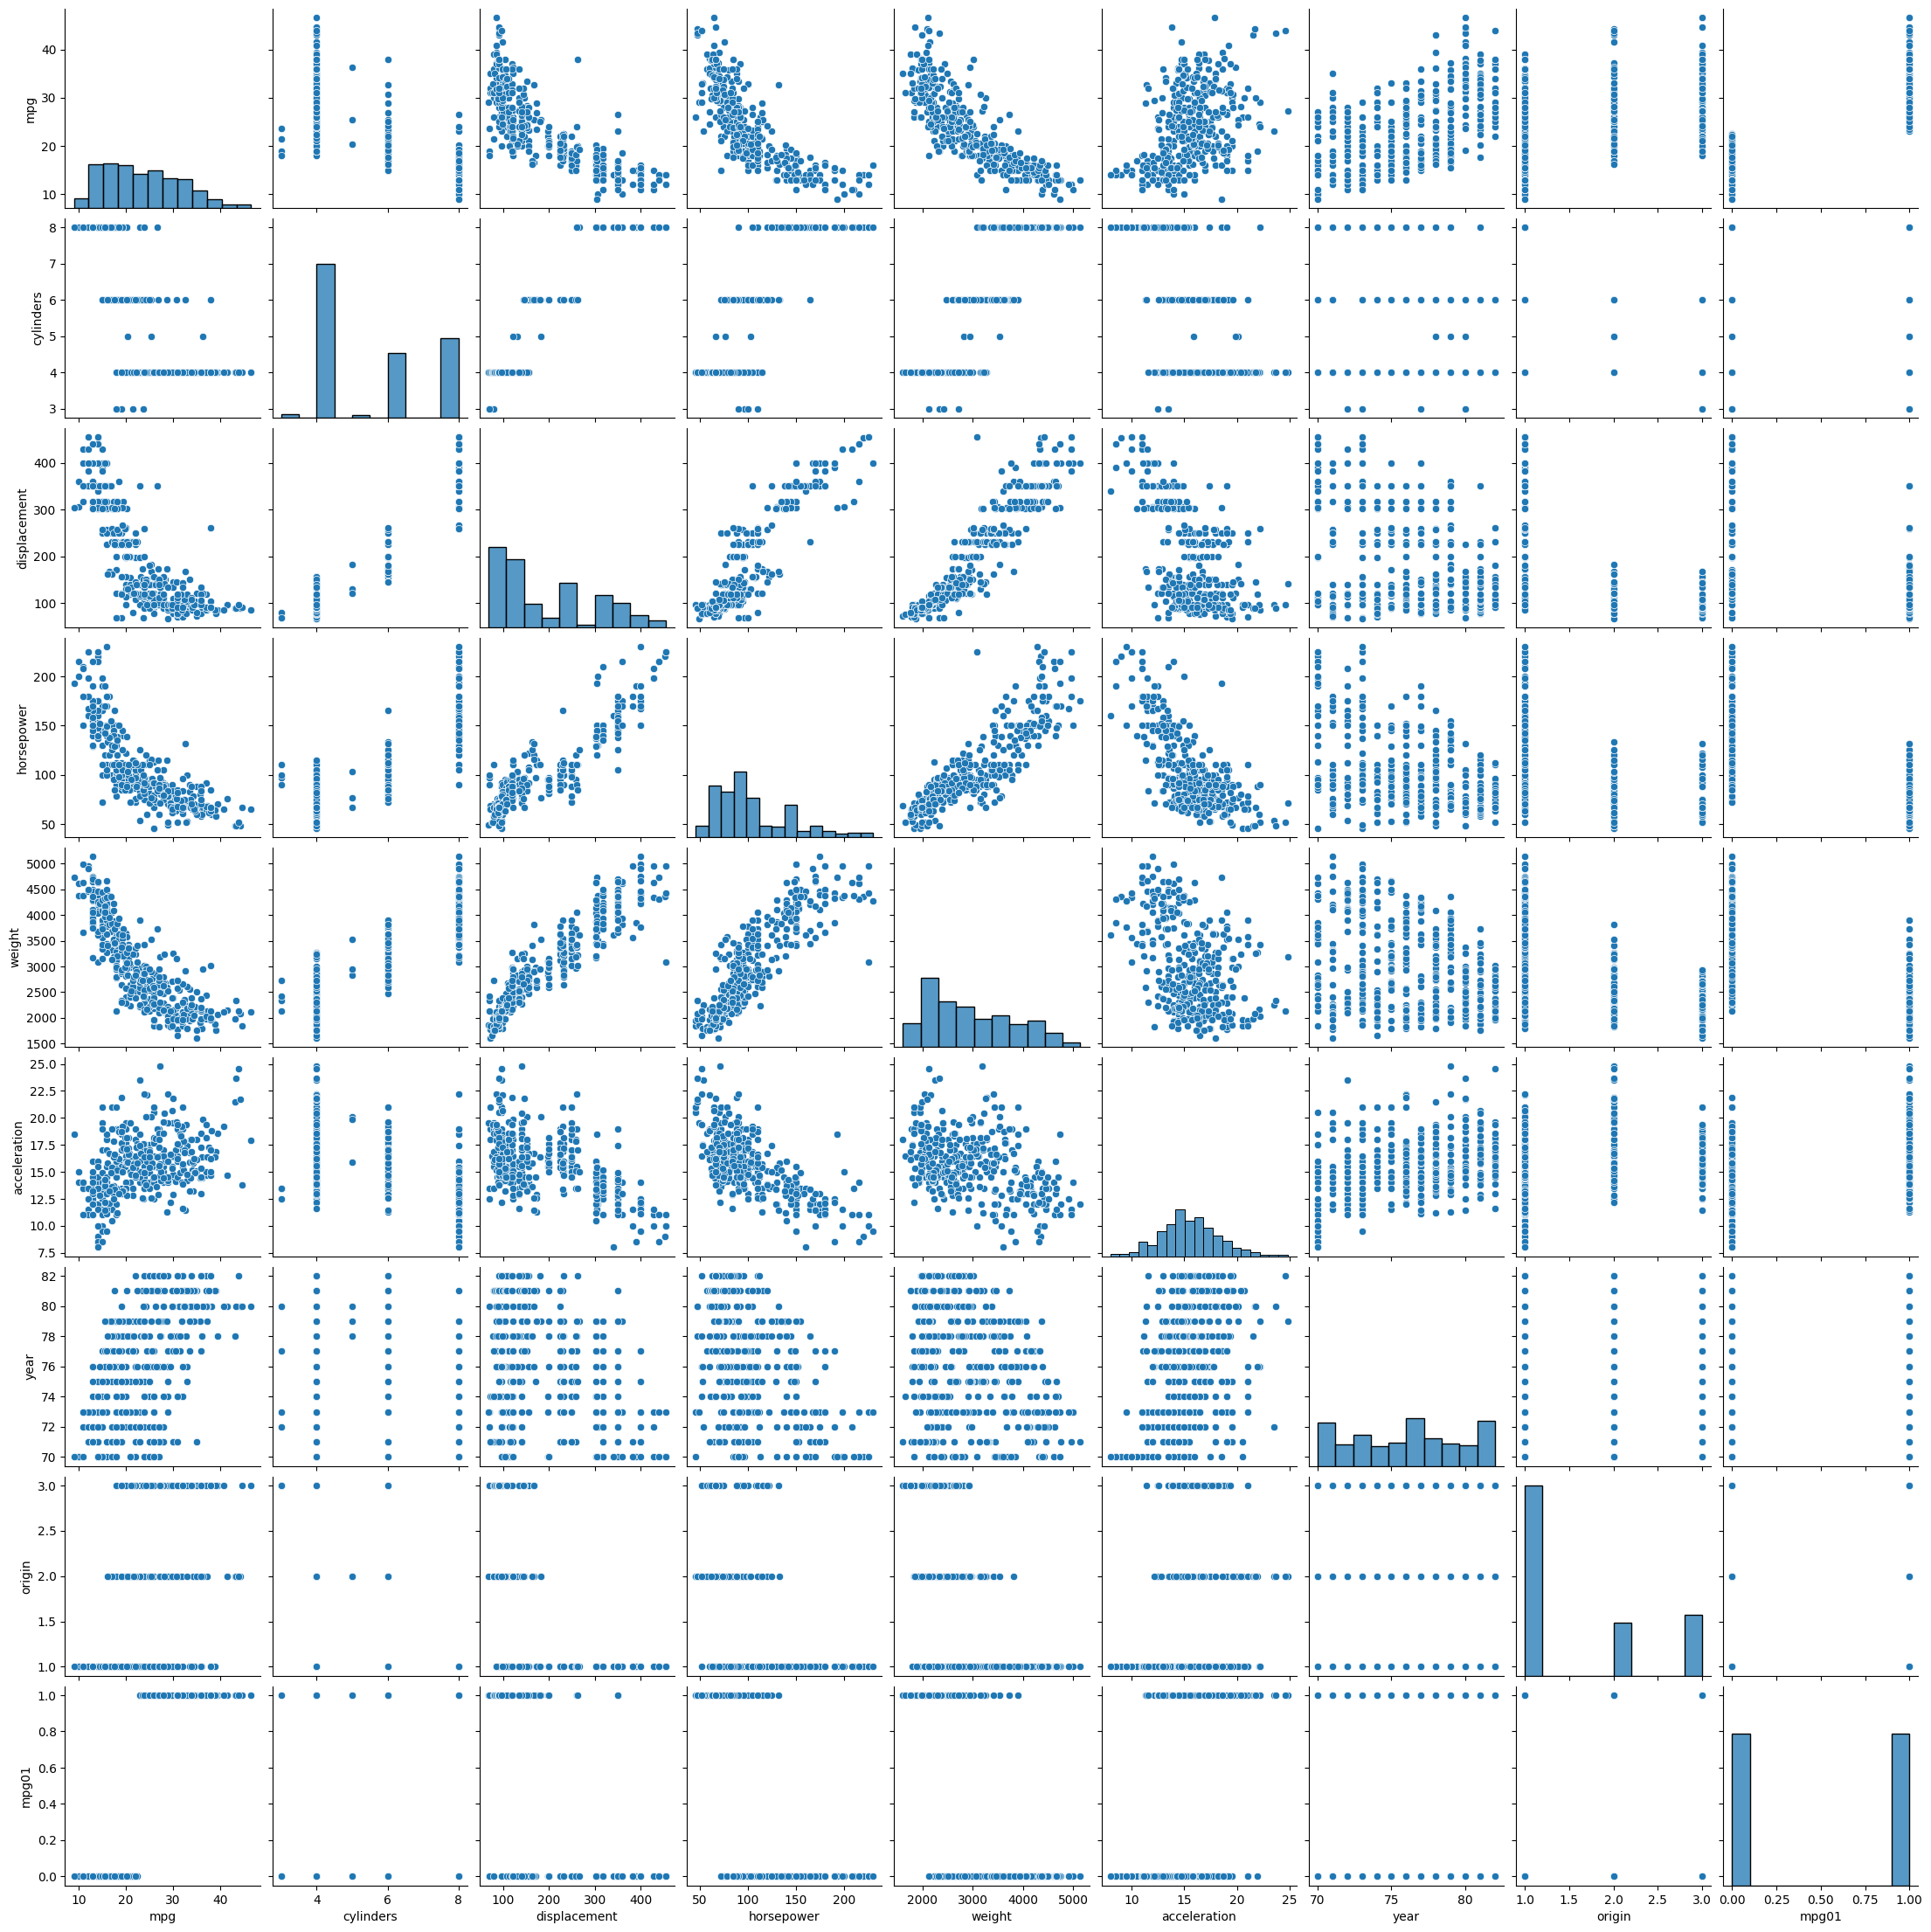

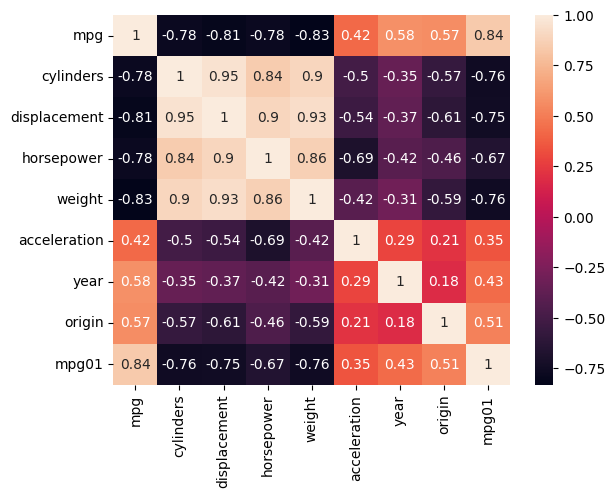

In [534]:
# BEGIN SOLUTION

sns.pairplot(auto)
dropName = auto.drop(columns = ['name']) #drop direction column so we can plot with heatmap
plt.figure()
sns.heatmap((dropName).corr(), annot=True); #stop text output

# END SOLUTION

> **_Answer:_**  [Visually, it is hard to see correlations between mpg01 and other variables as mpg01 is a binary output, but when plotting a heatmap with correlation values displayed, we can see that there is a strong negative correlation with 'cylinders', 'displacement', and 'weight'. There is a moderate negative correlation with 'horsepower'. Finally, there are moderate to lower moderate positive correlations with 'acceleration', 'year', and 'origin'].

c) Split the data into a training set and a test set (70%, 30%). Set the random seed to _4_ to make the training data reproducible.

In [535]:
# BEGIN SOLUTION

x_train, x_test, y_train, y_test = train_test_split(auto, auto['mpg01'], test_size=0.30, random_state=4)

# END SOLUTION

(d) Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

test error is 11.02%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


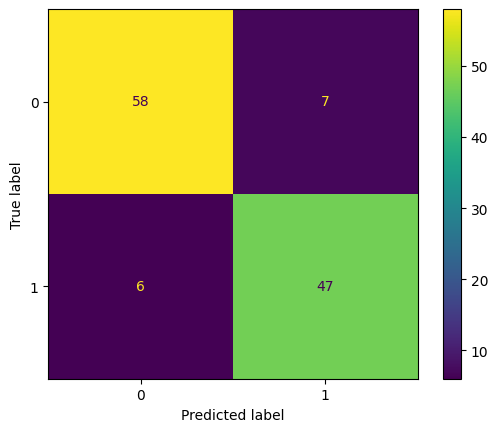

In [536]:
# BEGIN SOLUTION

x_train = x_train[['cylinders','displacement','weight','horsepower','origin']] #not using acceleration or year as the correlations are not as large as the other values
x_test = x_test[['cylinders','displacement','weight','horsepower','origin']] 

y_train = pd.DataFrame(y_train)
x_train = pd.DataFrame(x_train)
y_test = pd.DataFrame(y_test)
x_test = pd.DataFrame(x_test)

lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
ldaPredict = lda.predict(x_test)

cm = confusion_matrix(y_test,ldaPredict)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();
print(f'test error is {round(100*(1-((cm[0][0] + cm[1][1])/len(y_test))),2)}%')



# END SOLUTION

TEST ERROR = 11.02%

  (e) Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

test error is 11.02%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


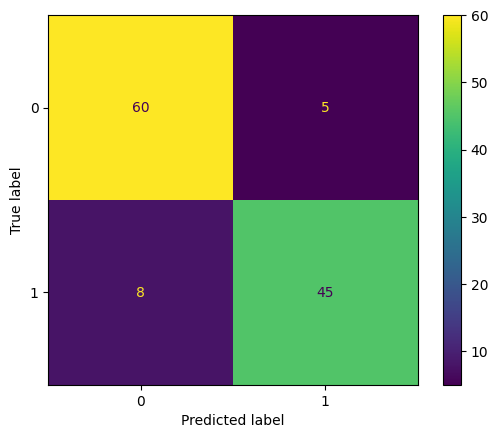

In [537]:
# BEGIN SOLUTION

qda = QuadraticDiscriminantAnalysis().fit(x_train, y_train)
qdaPredict = qda.predict(x_test)

cm = confusion_matrix(y_test,qdaPredict)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();
print(f'test error is {round(100*(1-((cm[0][0] + cm[1][1])/len(y_test))),2)}%')


# END SOLUTION

TEST ERROR = 11.02%

(f) Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

Optimization terminated successfully.
         Current function value: 0.271006
         Iterations 8
test error is 11.86%


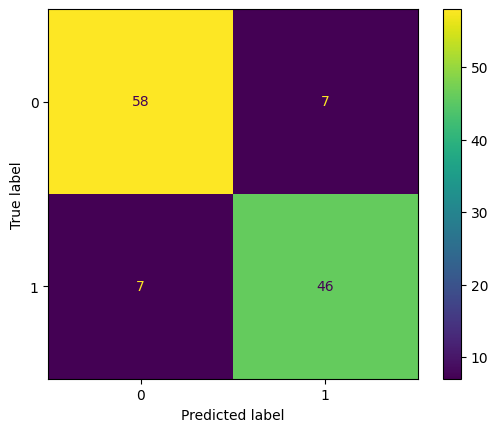

In [538]:
# BEGIN SOLUTION
x_train, x_test, y_train, y_test = train_test_split(auto, auto['mpg01'], test_size=0.30, random_state=4) #redefine variables cause we changed them earlier for LDA, QDA

x_train = x_train[['cylinders','displacement','weight','horsepower','origin']] #not using acceleration or year as the correlations are not as large as the other values
x_test = x_test[['cylinders','displacement','weight','horsepower','origin']] 



x_testC = sm.add_constant(x_test) #add constant
x_trainC = sm.add_constant(x_train) #add constant
logitModel = sm.Logit(y_train, x_trainC).fit()
logitModel.summary()

logitModelPredict = logitModel.predict(x_testC)
predictionDir = list(map(round, logitModelPredict)) #round probabilities

cm = confusion_matrix(y_test,predictionDir)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();
print(f'test error is {round(100*(1-((cm[0][0] + cm[1][1])/len(y_test))),2)}%')


# END SOLUTION

TEST ERROR = 11.86%

### Extra credit

Suppose that we wish to predict whether a given stock will issue a dividend this year (`Yes` or `No`) based on $X$, last year’s percent profit. We examine a large number of companies and discover that the mean value of $X$ for companies that issued a dividend was $\bar X = 10$, while the mean for those that didn’t was $\bar X = 0$. In addition, the variance of $X$ for these two sets of companies was $\sigma^2=36$. Finally, 80% of companies issued dividends. Assuming that $X$ follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was $X = 4$ last year.
 
Hint: Recall that the density function for a normal random variable is $f(x) = \frac{e^{-(x - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}}$. You will need to use Bayes’ theorem.

> **_Answer:_**  [BEGIN SOLUTION].